НАЧАЛЬНЫЕ УСЛОВИЯ

Импорт библиотек, установка темы и чтение данных.

In [3]:
from collections import Counter
from functools import reduce
import math
import random

import numpy as np  # for self-check purposes only
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [4]:
sns.set_theme()

In [5]:
with (open('set_1.csv', 'r') as f1,
      open('set_2.csv', 'r') as f2,
      open('set_3.csv', 'r') as f3):

    df1, df2, df3 = map(lambda s: list(map(float, s.split(','))), [f1.read(), f2.read(), f3.read()])

ОПРЕДЕЛЕНИЕ ФУНКЦИЙ `mean` И `std`

Реализация функции mean в python означает работу с дискретными выборками данных, хранящимися в различных итерациях, таких как list, tuple, set и т. д. Значит, будет использоваться формула суммирования:

E[X] = $\sum\limits_i^Nx_i$P($x_i$).

Чтобы вычислить P($x_i$) использовалось 'collections.Counter', каждое из его значений делится на общую длину данных.

In [6]:
def mean(data: list[float | int]) -> float:
    """Function for calculating mean value of the dataset.

    :param data: list of any numbers.
    :return: floating point number that represents mean value of the dataset.
    """
    counter: Counter = Counter(data)
    mean: float = sum([k * v / len(data) for k, v in counter.items()])

    return mean

СТАНДАРТНОЕ ОТКЛОНЕНИЕ

Формула, используемая для рассчета дисперсии:
Var(X) = E[X$^2$]-E[X]$^2$
Чтобы получить стандартное отклонение, извлекается корень из дисперсии:
$\sigma$(X) = $\sqrt{Var(X)}$ = $\sqrt{E[X^2]-E[X]^2}$.

In [7]:
def std(data: list[float | int]) -> float:
    r"""Computes standard deviation of the given dataset.

    :param data: list of any numbers.
    :return: floating point number that represents standard deviation of the dataset.
    """
    std: float = math.sqrt(mean([s ** 2 for s in data]) - mean(data) ** 2)

    return std

ПРОВЕРКА

In [8]:
assert np.allclose(mean(df1), np.mean(np.array(df1)))
assert np.allclose(mean(df2), np.mean(np.array(df2)))
assert np.allclose(mean(df3), np.mean(np.array(df3)))

assert np.allclose(std(df1), np.std(np.array(df1)))
assert np.allclose(std(df2), np.std(np.array(df2)))
assert np.allclose(std(df3), np.std(np.array(df3)))

ПОСТРОЕНИЕ НАБОРОБ ДАННЫХ

In [9]:
def remove_outliers(data: list[int | float]) -> list[int | float]:
    sigma: float = std(data)

    return list(filter(lambda x: -3 * sigma < x and x < 3 * sigma, data))

In [10]:
df1, df2, df3 = map(remove_outliers, [df1, df2, df3])


In [11]:
def nunique(data):
    return len(Counter(data))

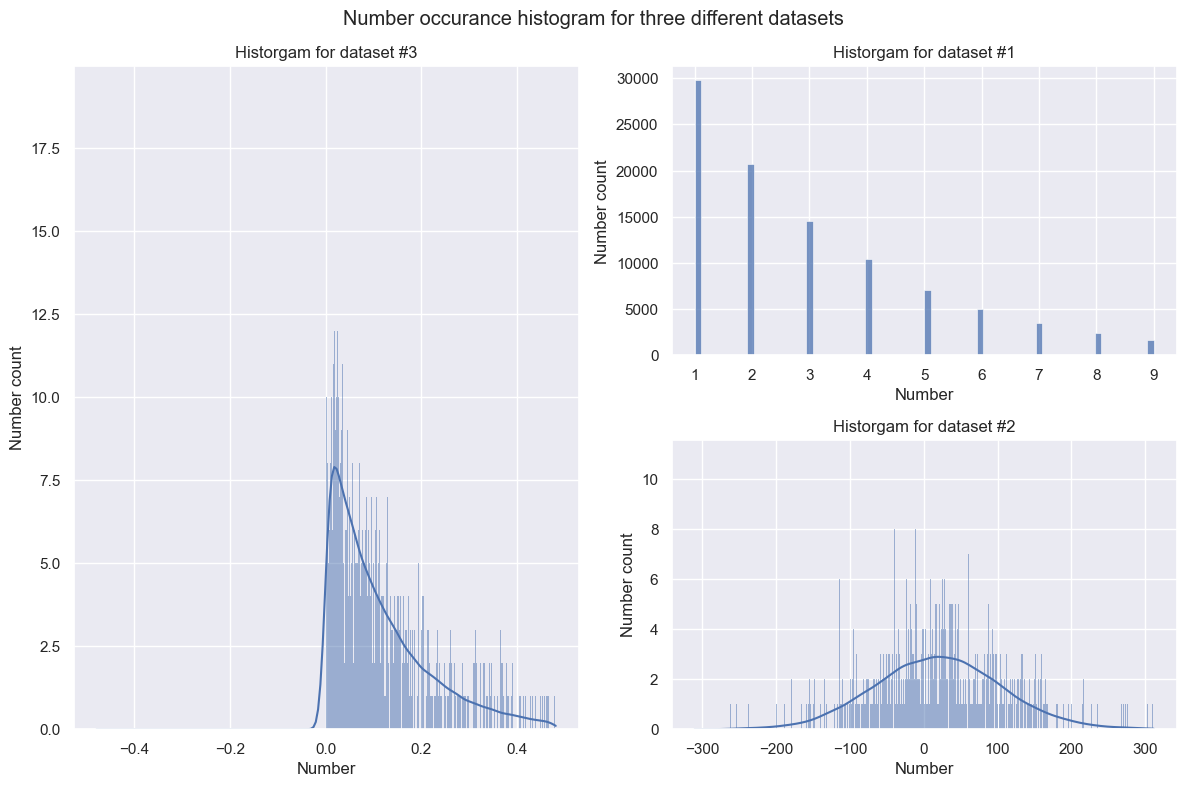

In [12]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(nrows=2, ncols=2)

ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[:, 0])

plt.suptitle('Number occurance histogram for three different datasets')

for i, (ax, df) in enumerate(zip([ax1, ax2, ax3], [df1, df2, df3])):
    n_bins: int = 70 if df is df1 else nunique(df)

    sns.histplot(df, bins=n_bins, kde=(df is not df1), ax=ax)
    ax.set_xlabel('Number')
    ax.set_ylabel('Number count')
    ax.set_title(f'Historgam for dataset #{i + 1}')

plt.tight_layout(pad=1)
plt.show()

ТЕОРИТИЧЕСКОЕ РАСПРЕДЕЛЕНИЕ ДАННЫХ

НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

In [13]:
def normal(mean: float, std: float, n: int) -> list[float]:
    data = [random.normalvariate(mean, std) for _ in range(n)]
    return data

ГЕОМЕТРИЧЕСКОЕ РАСПРЕДЕЛЕНИЕ

In [14]:
def geometric(mean: float, std: float, n: int) -> list[int]:
    data: list[int] = []
    p = 1 / (mean + std ** 2)

    for _ in range(n):
        k = 1
        while True:
            if random.random() <= p:
                break
            k += 1
        data.append(k)

    return data

РАСПРЕДЕЛЕНИЕ ПУАССОНА

In [15]:
def poisson(mean: float, std: float,  n: int) -> list[float]:
    data: list[float] = []
    lmbda = mean / std ** 2

    for _ in range(n):
        k, p = 0, 1
        while True:
            k += 1
            p *= random.random()
            if p <= math.exp(-lmbda):
                break
        data.append(k - 1)

    return data

РАВНОМЕРНОЕ РАСПРЕДЕЛЕНИЕ

In [16]:
def uniform(mean: float, std: float, n: int) -> list[float]:
    a = mean - math.sqrt(3) * std
    b = mean + math.sqrt(3) * std

    data = [random.uniform(a, b) for _ in range(n)]

    return data

БИНОМИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

In [17]:
def binomial(mean: float, std: float, n: int) -> list[int]:
    data: list[int] = []
    p: float = mean
    q: float = 1 - p

    data = [sum(random.choices([0, 1], weights=[p, q], k=n)) for _ in range(n)]

    return data

ЭКСПОНЕНЦИАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

In [18]:
def exponential(mean: float, n: int) -> list[float]:
    data = [random.expovariate(1 / mean) for _ in range(n)]
    return data

РАСЧЕТ $\mu$ И $\sigma$ ДЛЯ КАЖДОГО НАБОРА ДАННЫХ И СОЗДАНИЯ НОВЫХ РАСПРЕДЕЛЕНИЙ

In [19]:
mu_vals = list(map(mean, [df1, df2, df3]))
sigma_vals = list(map(std, [df1, df2, df3]))
N: int = 10000

In [20]:
distributions = [
    [normal(mu, sigma, N), poisson(mu, sigma, N), geometric(mu, sigma, N), exponential(mu, N), binomial(mu, sigma, N)]
    for i, (mu, sigma) in enumerate(zip(mu_vals, sigma_vals))
]
dist_names = ['Normal', 'Uniform', 'Poisson', 'Geometric', 'Exponential', 'Binomial']

ПОСТРОЕНИЕ НОВЫХ РАСПРЕДЕЛЕНИЙ

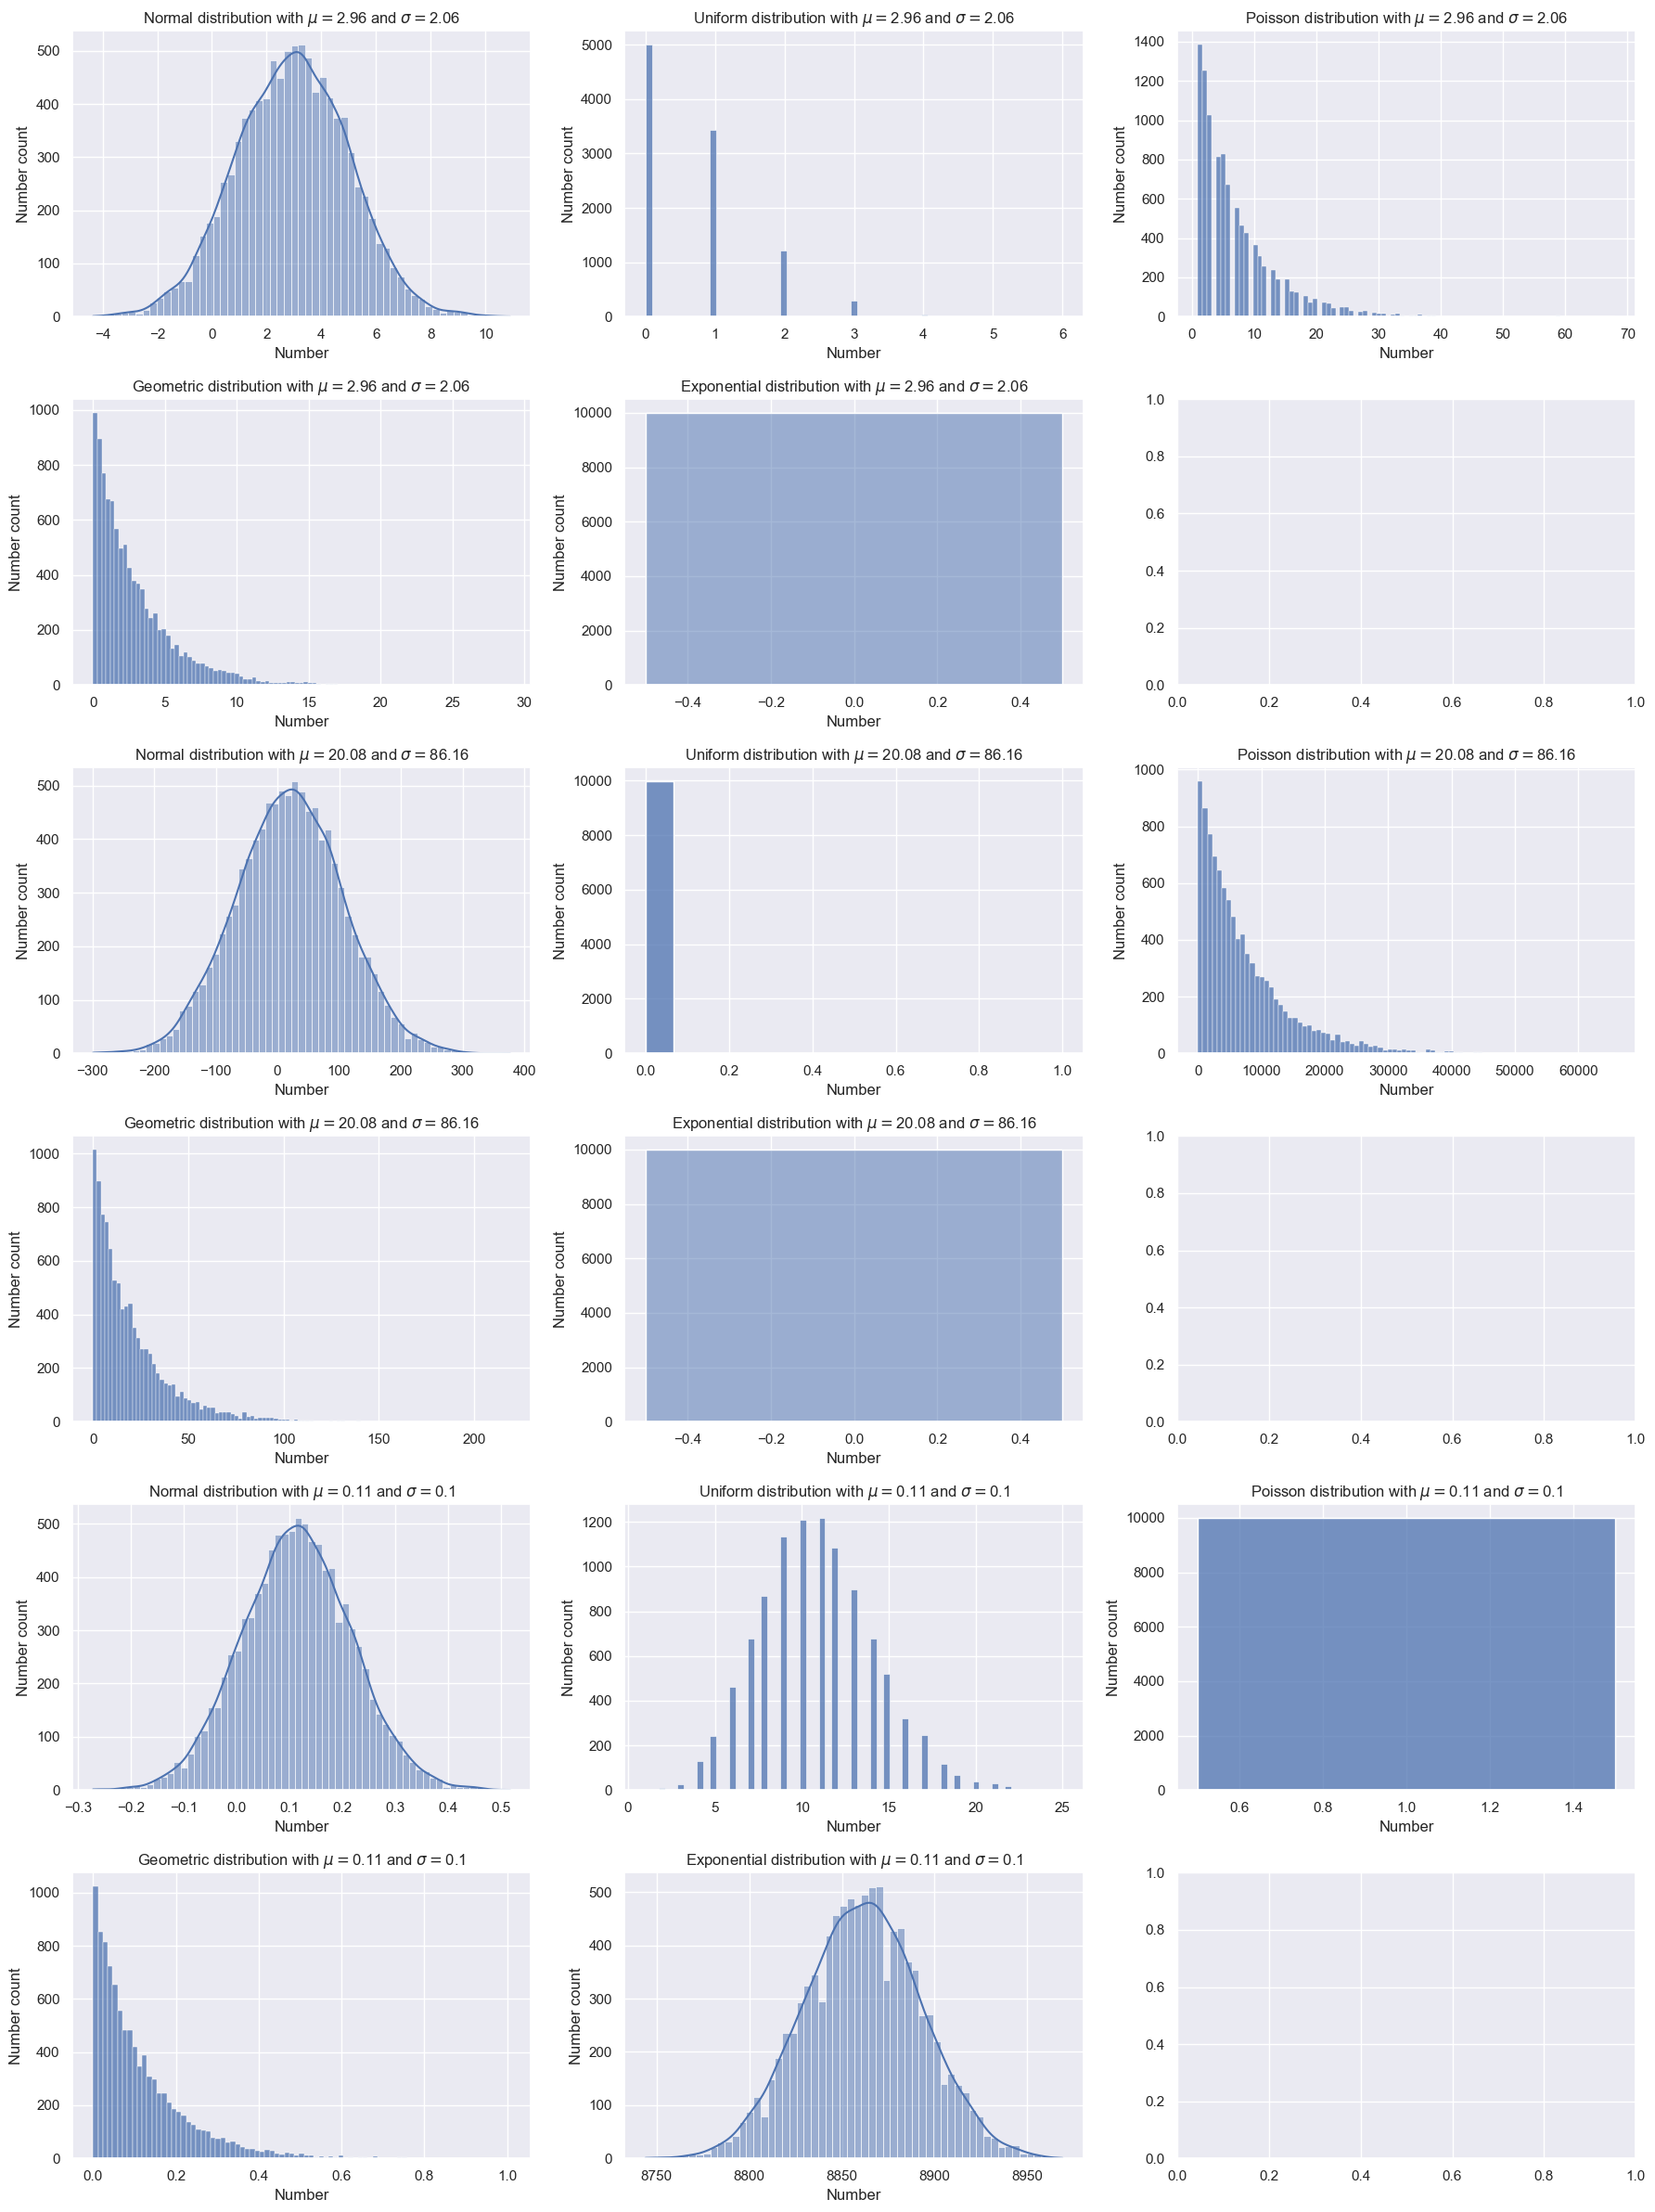

In [21]:
fig = plt.figure(figsize=(18, 24))
gs = fig.add_gridspec(2 * len(distributions), 3)

for i, (dist_set, mu, sigma) in enumerate(zip(distributions, mu_vals, sigma_vals)):
    axes: list = []

    for j in range(2):
        for k in range(3):
            axes += [fig.add_subplot(gs[i * 2 + j, k])]

    for dist, name, ax in zip(dist_set, dist_names, axes):
        ax.set_xlabel('Number')
        ax.set_ylabel('Number count')
        ax.set_title(rf'{name} distribution with $\mu=${round(mu, 2)} and $\sigma=${round(sigma, 2)}')

        sns.histplot(dist, kde=(name in ['Normal', 'Exponential']), ax=ax)

plt.tight_layout()
plt.show()